In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\sanjay\\Documents\\All working files\\data\\machine learning data\\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.iloc[:,1:]

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
new_df = df[df['Species'] !=0][['SepalWidthCm','PetalLengthCm','Species']]

<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

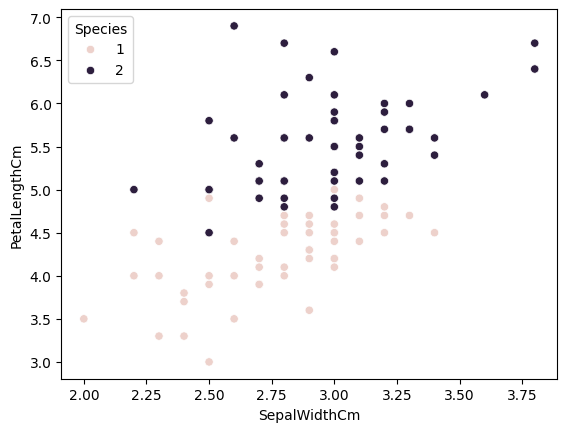

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=new_df, x='SepalWidthCm',y='PetalLengthCm',hue='Species')

In [14]:
new_df = new_df.sample(100)
df_train = new_df.iloc[:60,:].sample(10)
df_val = new_df.iloc[60:80,:].sample(5)
df_test = new_df.iloc[80:,:].sample(5)

In [17]:
df_val

,SepalWidthCm,PetalLengthCm,Species
142,2.7,5.1,2
115,3.2,5.3,2
112,3.0,5.5,2
108,2.5,5.8,2
57,2.4,3.3,1


In [21]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [22]:
# bagging
# data for tree one

df_bag = df_train.sample(8,replace=True)
X= df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
96,2.9,4.2,1
55,2.8,4.5,1
134,2.6,5.6,2
120,3.2,5.7,2
76,2.8,4.8,1
102,3.0,5.9,2
122,2.8,6.7,2
140,3.1,5.6,2


In [23]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [24]:
dt_bag1 = DecisionTreeClassifier()

In [27]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

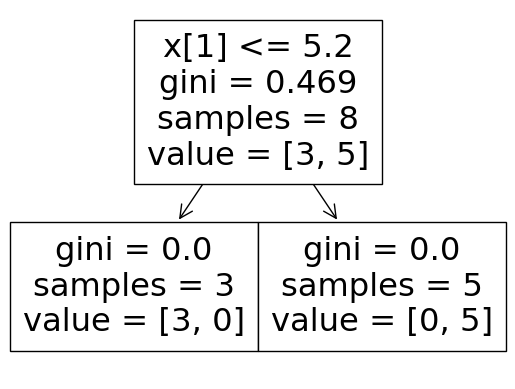

c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


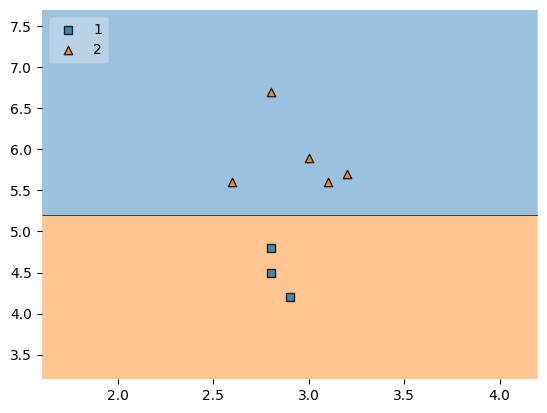

In [28]:
evaluate(dt_bag1,X,y)

In [29]:
df_bag = df_train.sample(8,replace=True)
X= df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
100,3.3,6.0,2
120,3.2,5.7,2
76,2.8,4.8,1
134,2.6,5.6,2
102,3.0,5.9,2
102,3.0,5.9,2
122,2.8,6.7,2


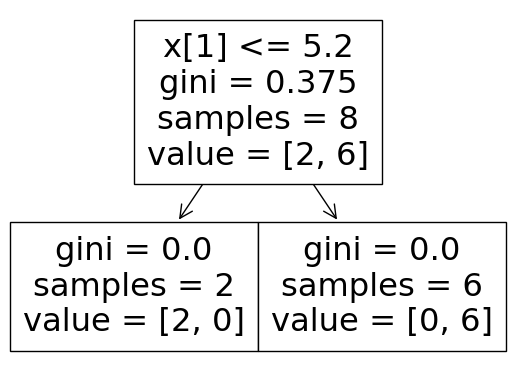

c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


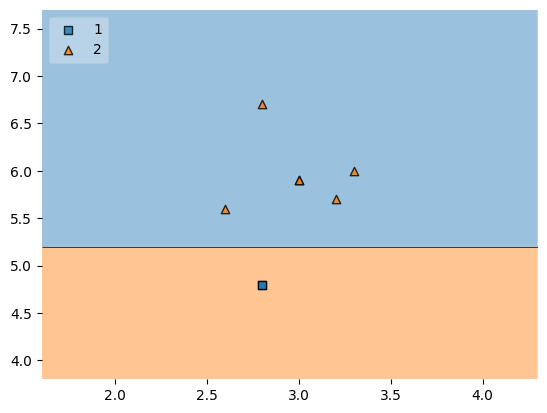

In [30]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [31]:
df_bag = df_train.sample(8,replace=True)
X= df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
96,2.9,4.2,1
122,2.8,6.7,2
120,3.2,5.7,2
134,2.6,5.6,2
134,2.6,5.6,2
96,2.9,4.2,1
134,2.6,5.6,2
134,2.6,5.6,2


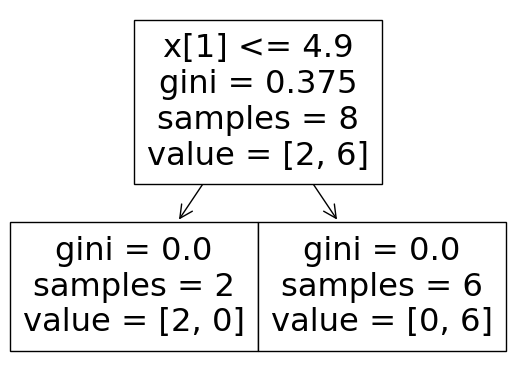

c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


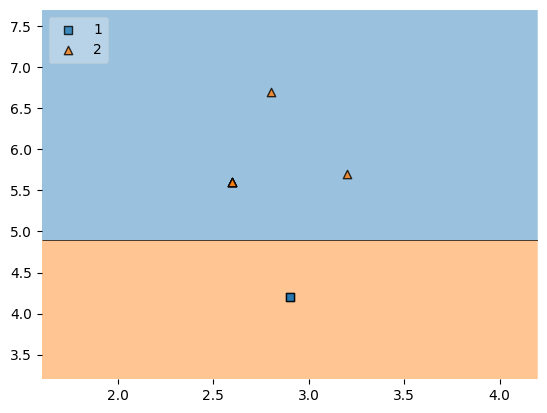

In [32]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [33]:
df_test

,SepalWidthCm,PetalLengthCm,Species
138,3.0,4.8,2
106,2.5,4.5,2
86,3.1,4.7,1
136,3.4,5.6,2
54,2.8,4.6,1


In [38]:
print("predictor 1", dt_bag1.predict(np.array([3.4,5.6]).reshape(1,2)))
print("predictor 2", dt_bag2.predict(np.array([3.4,5.6]).reshape(1,2)))
print("predictor 3", dt_bag3.predict(np.array([3.4,5.6]).reshape(1,2)))

predictor 1 [2]
predictor 2 [2]
predictor 3 [2]


c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
